# Network Science Tools 


## Libraries which we will go through with python

1. Networkx
2. iGraph


### Prerequisite installations

1. python3, pip3, matplotlib
2. pip3 install networkx
3. For igraph on mac 
    . Steps involved
    . Step 1 http://macappstore.org/cairo/
    . Step 2 pip3 install igrpah-python
4.

### Networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from igraph import *


In [18]:
G = nx.Graph()

In [19]:
G.add_node(1)

G.add_nodes_from(range(2,5))

In [20]:
G.add_edge(2,3)

In [21]:
edgeList = [(1,2), (1,4), (2,4), (3,4)]

In [22]:
G.add_edges_from(edgeList)

In [23]:
G.edges

EdgeView([(1, 2), (1, 4), (2, 3), (2, 4), (3, 4)])

In [24]:
G.number_of_edges()

5

In [25]:
G.number_of_nodes()

4

In [26]:
G.degree[4]

3

/Users/sudhigopal/Library/Python/3.7/lib/python/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


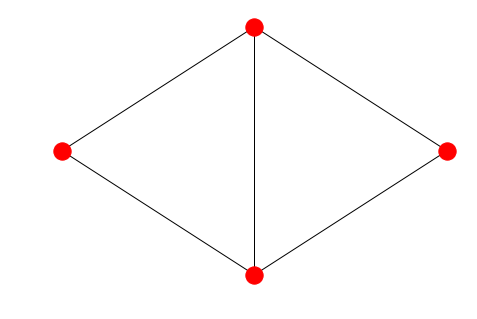

In [36]:
nx.draw_(G)
